In [5]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [4]:
np.random.seed(42)
X = np.random.rand(100, 1) - 0.5
y = 3*X[:, 0]**2 + 0.05 * np.random.randn(100)

In [6]:
df = pd.DataFrame()

In [7]:
df['X'] = X.reshape(100)
df['y'] = y

In [8]:
df

,X,y
0,-0.125460,0.051573
1,0.450714,0.594480
2,0.231994,0.166052
3,0.098658,-0.070178
4,-0.343981,0.343986
...,...,...
95,-0.006204,-0.040675
96,0.022733,-0.002305
97,-0.072459,0.032809
98,-0.474581,0.689516


Text(0.5, 1.0, 'X vs Y')

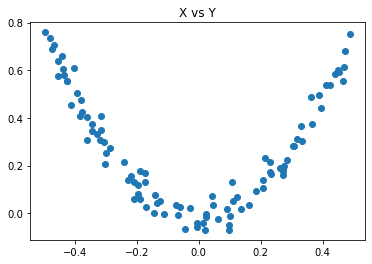

In [9]:
plt.scatter(df['X'],df['y'])
plt.title('X vs Y')

In [10]:
df['pred1'] = df['y'].mean()

In [11]:
df

,X,y,pred1
0,-0.125460,0.051573,0.265458
1,0.450714,0.594480,0.265458
2,0.231994,0.166052,0.265458
3,0.098658,-0.070178,0.265458
4,-0.343981,0.343986,0.265458
...,...,...,...
95,-0.006204,-0.040675,0.265458
96,0.022733,-0.002305,0.265458
97,-0.072459,0.032809,0.265458
98,-0.474581,0.689516,0.265458


In [12]:
df['res1'] = df['y'] - df['pred1']

In [13]:
df

,X,y,pred1,res1
0,-0.125460,0.051573,0.265458,-0.213885
1,0.450714,0.594480,0.265458,0.329021
2,0.231994,0.166052,0.265458,-0.099407
3,0.098658,-0.070178,0.265458,-0.335636
4,-0.343981,0.343986,0.265458,0.078528
...,...,...,...,...
95,-0.006204,-0.040675,0.265458,-0.306133
96,0.022733,-0.002305,0.265458,-0.267763
97,-0.072459,0.032809,0.265458,-0.232650
98,-0.474581,0.689516,0.265458,0.424057


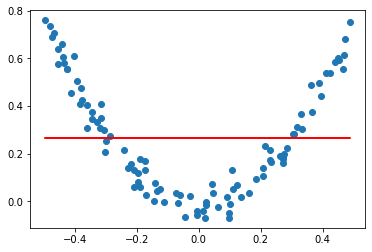

In [14]:
plt.scatter(df['X'],df['y'])
plt.plot(df['X'],df['pred1'],color='red')

In [15]:
from sklearn.tree import DecisionTreeRegressor

In [16]:
tree1 = DecisionTreeRegressor(max_leaf_nodes=8)

In [17]:
tree1.fit(df['X'].values.reshape(100,1),df['res1'].values)

DecisionTreeRegressor(max_leaf_nodes=8)

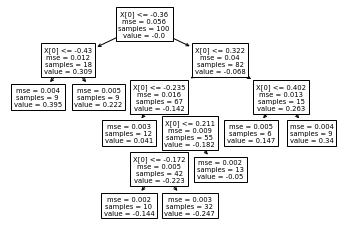

In [18]:
from sklearn.tree import plot_tree
plot_tree(tree1)
plt.show()

In [19]:
#genrating a x_test

In [20]:
X_test = np.linspace(-0.5, 0.5, 500)

In [21]:
y_pred = 0.265458 + tree1.predict(X_test.reshape(500, 1))

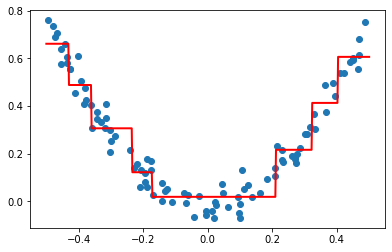

In [22]:
plt.figure(figsize=(14,4))
plt.subplot(121)
plt.plot(X_test, y_pred, linewidth=2,color='red')
plt.scatter(df['X'],df['y'])

In [25]:
df['pred2'] = 0.265458 + tree1.predict(df['X'].values.reshape(100,1))

In [26]:
df

,X,y,pred1,res1,pred2
0,-0.125460,0.051573,0.265458,-0.213885,0.018319
1,0.450714,0.594480,0.265458,0.329021,0.605884
2,0.231994,0.166052,0.265458,-0.099407,0.215784
3,0.098658,-0.070178,0.265458,-0.335636,0.018319
4,-0.343981,0.343986,0.265458,0.078528,0.305964
...,...,...,...,...,...
95,-0.006204,-0.040675,0.265458,-0.306133,0.018319
96,0.022733,-0.002305,0.265458,-0.267763,0.018319
97,-0.072459,0.032809,0.265458,-0.232650,0.018319
98,-0.474581,0.689516,0.265458,0.424057,0.660912


In [27]:
df['res2'] = df['y'] - df['pred2']

In [28]:
df

,X,y,pred1,res1,pred2,res2
0,-0.125460,0.051573,0.265458,-0.213885,0.018319,0.033254
1,0.450714,0.594480,0.265458,0.329021,0.605884,-0.011404
2,0.231994,0.166052,0.265458,-0.099407,0.215784,-0.049732
3,0.098658,-0.070178,0.265458,-0.335636,0.018319,-0.088497
4,-0.343981,0.343986,0.265458,0.078528,0.305964,0.038022
...,...,...,...,...,...,...
95,-0.006204,-0.040675,0.265458,-0.306133,0.018319,-0.058994
96,0.022733,-0.002305,0.265458,-0.267763,0.018319,-0.020624
97,-0.072459,0.032809,0.265458,-0.232650,0.018319,0.014489
98,-0.474581,0.689516,0.265458,0.424057,0.660912,0.028604


In [29]:
tree2 = DecisionTreeRegressor(max_leaf_nodes=8)

In [30]:
tree2.fit(df['X'].values.reshape(100,1),df['res2'].values)

DecisionTreeRegressor(max_leaf_nodes=8)

In [31]:
y_pred = 0.265458 + sum(regressor.predict(X_test.reshape(-1, 1)) for regressor in [tree1,tree2])

Text(0.5, 1.0, 'X vs y')

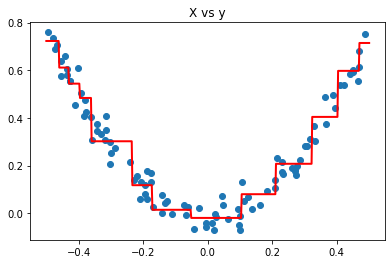

In [32]:
plt.figure(figsize=(14,4))
plt.subplot(121)
plt.plot(X_test, y_pred, linewidth=2,color='red')
plt.scatter(df['X'],df['y'])
plt.title('X vs y')

In [33]:
df

,X,y,pred1,res1,pred2,res2
0,-0.125460,0.051573,0.265458,-0.213885,0.018319,0.033254
1,0.450714,0.594480,0.265458,0.329021,0.605884,-0.011404
2,0.231994,0.166052,0.265458,-0.099407,0.215784,-0.049732
3,0.098658,-0.070178,0.265458,-0.335636,0.018319,-0.088497
4,-0.343981,0.343986,0.265458,0.078528,0.305964,0.038022
...,...,...,...,...,...,...
95,-0.006204,-0.040675,0.265458,-0.306133,0.018319,-0.058994
96,0.022733,-0.002305,0.265458,-0.267763,0.018319,-0.020624
97,-0.072459,0.032809,0.265458,-0.232650,0.018319,0.014489
98,-0.474581,0.689516,0.265458,0.424057,0.660912,0.028604


In [36]:
df['pred3'] = 0.265458 + tree1.predict(df['X'].values.reshape(100,1)) +tree2.predict(df['X'].values.reshape(100,1)) 

In [37]:
df

,X,y,pred1,res1,pred2,res2,pred3
0,-0.125460,0.051573,0.265458,-0.213885,0.014321,0.033254,0.014321
1,0.450714,0.594480,0.265458,0.329021,0.597523,-0.011404,0.597523
2,0.231994,0.166052,0.265458,-0.099407,0.207423,-0.049732,0.207423
3,0.098658,-0.070178,0.265458,-0.335636,-0.019811,-0.088497,-0.019811
4,-0.343981,0.343986,0.265458,0.078528,0.301966,0.038022,0.301966
...,...,...,...,...,...,...,...
95,-0.006204,-0.040675,0.265458,-0.306133,-0.019811,-0.058994,-0.019811
96,0.022733,-0.002305,0.265458,-0.267763,-0.019811,-0.020624,-0.019811
97,-0.072459,0.032809,0.265458,-0.232650,0.014321,0.014489,0.014321
98,-0.474581,0.689516,0.265458,0.424057,0.722987,0.028604,0.722987


In [38]:
df['res3'] = df['y'] - df['pred3']

In [39]:
df

,X,y,pred1,res1,pred2,res2,pred3,res3
0,-0.125460,0.051573,0.265458,-0.213885,0.014321,0.033254,0.014321,0.037252
1,0.450714,0.594480,0.265458,0.329021,0.597523,-0.011404,0.597523,-0.003043
2,0.231994,0.166052,0.265458,-0.099407,0.207423,-0.049732,0.207423,-0.041371
3,0.098658,-0.070178,0.265458,-0.335636,-0.019811,-0.088497,-0.019811,-0.050367
4,-0.343981,0.343986,0.265458,0.078528,0.301966,0.038022,0.301966,0.042020
...,...,...,...,...,...,...,...,...
95,-0.006204,-0.040675,0.265458,-0.306133,-0.019811,-0.058994,-0.019811,-0.020864
96,0.022733,-0.002305,0.265458,-0.267763,-0.019811,-0.020624,-0.019811,0.017506
97,-0.072459,0.032809,0.265458,-0.232650,0.014321,0.014489,0.014321,0.018488
98,-0.474581,0.689516,0.265458,0.424057,0.722987,0.028604,0.722987,-0.033472
